In [ ]:
!pip install googledrivedownloader

fileid="1V0ELMWF5qSmCF4rOuKChnizgp-w49I5a"
filename='fer2013.csv'

from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id=fileid,
                                    dest_path='./'+filename,
                                    unzip=False)
!ls -l


total 16
drwx------ 6 root root 4096 Oct 19 11:42 drive
drwxr-xr-x 3 root root 4096 Oct 19 11:43 fer2013-1.1.1
-rw-r--r-- 1 root root 2423 Oct 19 11:59 fer2013.csv
drwxr-xr-x 1 root root 4096 Oct 17 13:21 sample_data


In [ ]:
import pandas

data = pandas.read_csv("/content/drive/MyDrive/Face_Emotion/fer2013.csv")

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
print('Samples distribution across Usage:')
print(data.Usage.value_counts())

Samples distribution across Usage:
Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64


In [ ]:
print('Samples per emotion:')
print(data.emotion.value_counts())

Samples per emotion:
emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64


In [ ]:
print('Number of pixels for a sample:')
print(len(data.pixels[0].split(' ')))

Number of pixels for a sample:
2304


In [ ]:
train_set = data[(data.Usage == 'Training')]
validation_set = data[(data.Usage == 'PublicTest')]
test_set = data[(data.Usage == 'PrivateTest')]

In [ ]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
num_classes = len(emotion_labels)

In [ ]:
from math import sqrt

depth = 1
height = int(sqrt(len(data.pixels[0].split())))
width = height

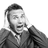

Fear


In [ ]:
sample_number = 17 # @param {"type":"slider","min":0,"max":2000,"step":1}

import numpy as np
from PIL import Image # Import the Image module from Pillow
from IPython.display import display

array = np.mat(data.pixels[sample_number]).reshape(48,48)
# Use Image.fromarray to convert the NumPy array to a PIL Image
image = Image.fromarray(array.astype(np.uint8)) # Ensure the array is of type uint8
display(image)
print(emotion_labels[data.emotion[sample_number]])

In [ ]:
X_train = np.array([list(map(float, x.split())) for x in train_set.pixels], np.float32)
X_validation = np.array([list(map(float, x.split())) for x in validation_set.pixels], np.float32)
X_test = np.array([list(map(float, x.split())) for x in test_set.pixels], np.float32)

# The rest of your code remains the same...

num_train = X_train.shape[0]
num_validation = X_validation.shape[0]
num_test = X_test.shape[0]

X_train = X_train.reshape(num_train, width, height, depth)
X_validation = X_validation.reshape(num_test, width, height, depth)
X_test = X_test.reshape(num_test, width, height, depth)

print('Training: ',X_train.shape)
print('Validation: ',X_validation.shape)
print('Test: ',X_test.shape)

Training:  (28709, 48, 48, 1)
Validation:  (3589, 48, 48, 1)
Test:  (3589, 48, 48, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = train_set.emotion
y_train = to_categorical(y_train, num_classes)

y_validation = validation_set.emotion
y_validation = to_categorical(y_validation, num_classes)

y_test = test_set.emotion
y_test = to_categorical(y_test, num_classes)

print('Training: ',y_train.shape)
print('Validation: ',y_validation.shape)
print('Test: ',y_test.shape)

Training:  (28709, 7)
Validation:  (3589, 7)
Test:  (3589, 7)


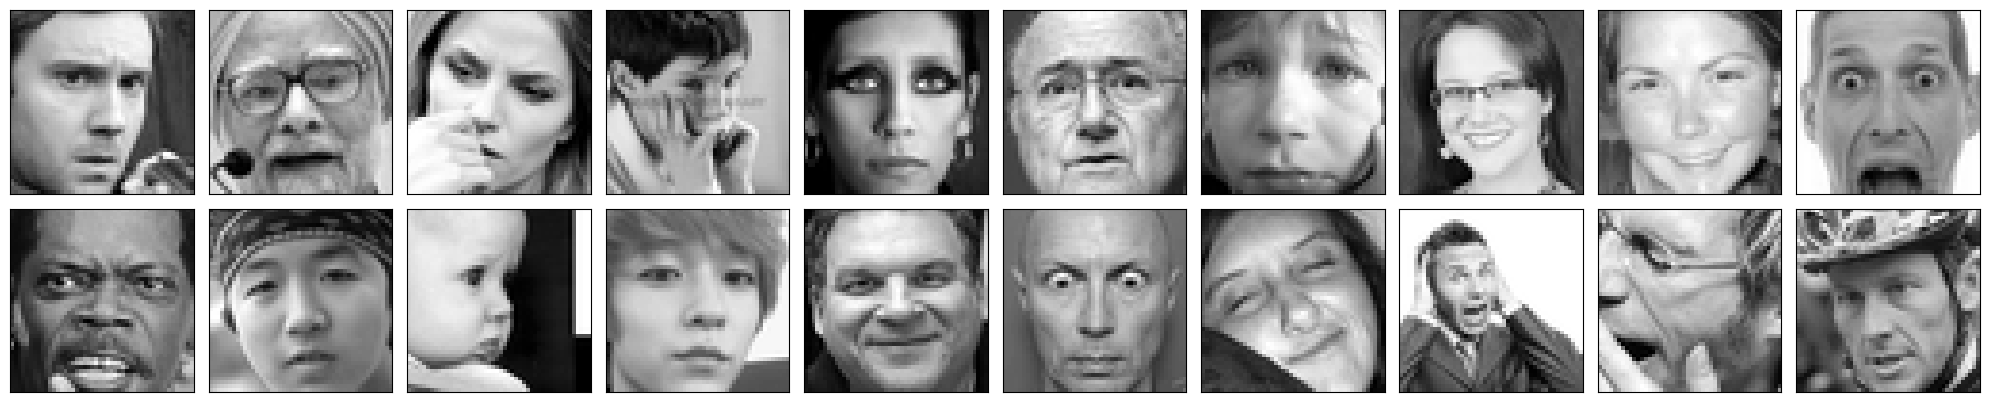

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def overview(start, end, X):
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(10,10,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,20, X_train)

**Using a More Powerful Optimizer**

In [ ]:
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Sequential

model = Sequential()

model.add(Convolution2D(64, (3, 1), padding='same', input_shape=(48,48,1)))
model.add(Convolution2D(64, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 1), padding='same'))
model.add(Convolution2D(128, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 1), padding='same'))
model.add(Convolution2D(256, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(512, (3, 1), padding='same'))
model.add(Convolution2D(512, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7))
model.add(Activation('softmax'))

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max') # Changed filepath to end with .keras

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam

model = Sequential()

# First Block
model.add(Convolution2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.1))

# Second Block
model.add(Convolution2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.1))

# Third Block
model.add(Convolution2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.1))

# Fourth Block
model.add(Convolution2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.1))

# Global Average Pooling
model.add(GlobalAveragePooling2D())

# Fully Connected Layers
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Output Layer
model.add(Dense(7))
model.add(Activation('softmax'))

# Compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,952,519 (7.45 MB)

 Trainable params: 1,949,063 (7.44 MB)

 Non-trainable params: 3,456 (13.50 KB)

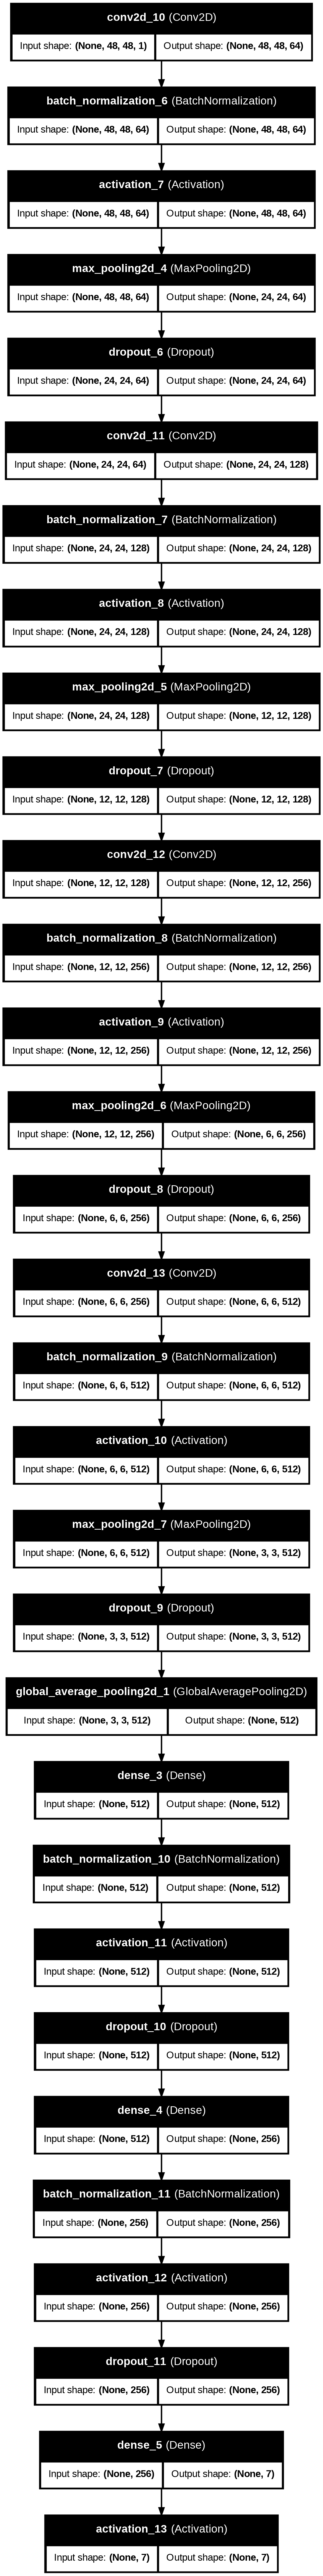

In [ ]:

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation for the training set
datagen = ImageDataGenerator(
    featurewise_center=False,            # Don't normalize featurewise
    samplewise_center=False,             # Don't normalize samplewise
    featurewise_std_normalization=False, # No std normalization across the dataset
    samplewise_std_normalization=False,  # No std normalization across each sample
    zca_whitening=False,                 # No ZCA whitening
    rotation_range=10,                   # Small rotation to increase variation
    width_shift_range=0.1,               # Shift images horizontally
    height_shift_range=0.1,              # Shift images vertically
    zoom_range=0.1,                      # Random zoom
    horizontal_flip=True,                # Randomly flip images horizontally
    vertical_flip=False,                 # No vertical flipping
    fill_mode='nearest'                  # Filling mode when augmenting images
)
datagen.fit(X_train)
val_datagen = ImageDataGenerator()
val_datagen.fit(X_validation)

# Define batch_size here
batch_size = 32  # You can adjust this value as needed

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_validation, y_validation),
    epochs=100,
    verbose=1
)

Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.2308 - loss: 1.9443 - val_accuracy: 0.3196 - val_loss: 1.7242
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.3322 - loss: 1.7114 - val_accuracy: 0.3845 - val_loss: 1.5915
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.3821 - loss: 1.5980 - val_accuracy: 0.4235 - val_loss: 1.5002
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.4152 - loss: 1.5151 - val_accuracy: 0.4193 - val_loss: 1.5415
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.4433 - loss: 1.4589 - val_accuracy: 0.4787 - val_loss: 1.3549
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.4550 - loss: 1.4146 - val_accuracy: 0.4848 - val_loss: 1.3406
Epoch 7/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.4789 - loss: 1.3608 - val_accuracy: 0.3962 - val_loss: 1.6498
Epoch 8/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.4916 - loss: 1

In [ ]:
import math

score = model.evaluate(X_test, y_test, steps=math.ceil(len(X_test) / batch_size))  # Use math.ceil to round up
print('Evaluation loss: ', score[0])
print('Evaluation accuracy: ', score[1])

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6679 - loss: 0.9749
Evaluation loss:  0.9594630599021912
Evaluation accuracy:  0.6737252473831177


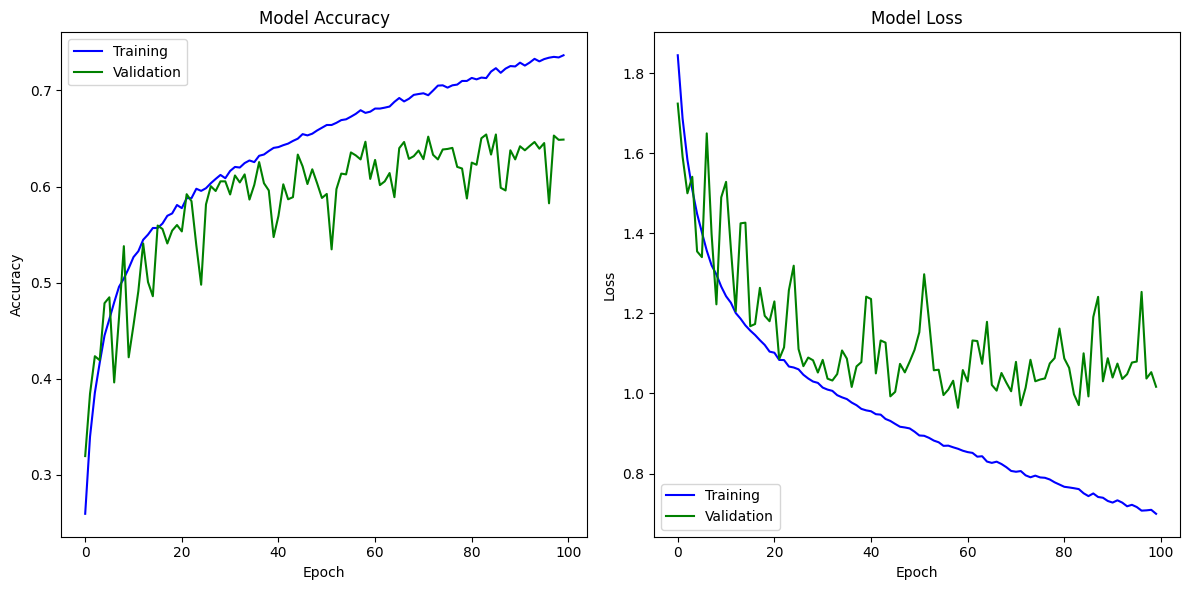

In [ ]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(history.history['accuracy'], color='b', label='Training')
plt.plot(history.history['val_accuracy'], color='g', label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(history.history['loss'], color='b', label='Training')
plt.plot(history.history['val_loss'], color='g', label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')

# Show the plots
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[Text(0.5, 68.24999999999999, 'Predicted label'),
 Text(83.24999999999999, 0.5, 'True label')]

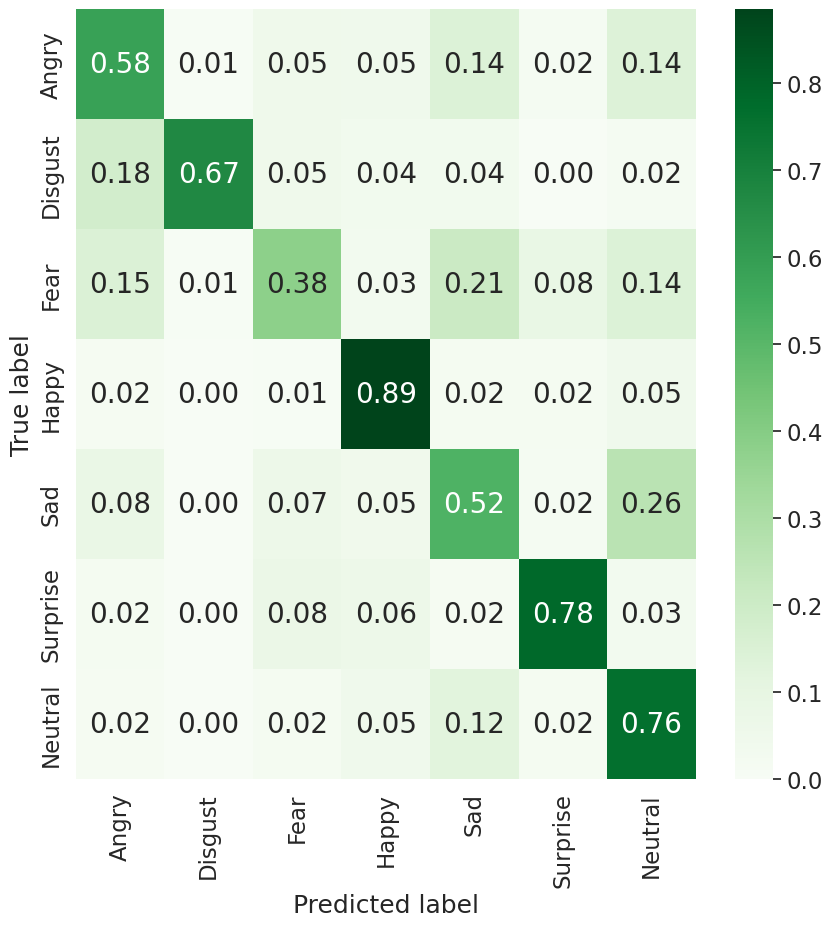

In [ ]:
y_pred_probs = model.predict(X_test)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.asarray([np.argmax(i) for i in y_test])

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm_normalised, annot=True, linewidths=0, square=False,
                    cmap="Greens", yticklabels=emotion_labels, xticklabels=emotion_labels, vmin=0, vmax=np.max(cm_normalised),
                    fmt=".2f", annot_kws={"size": 20})
ax.set(xlabel='Predicted label', ylabel='True label')

In [ ]:
model_json = model.to_json()
with open("model.json","w") as json_file:
     json_file.write(model_json)

model.save('weights.h5')